In [64]:
"""
This is a comment. With 3 quotation symbols you begin and end a block comment in python.

Below are the libraries and classes (objects) that we are importing from those libraries.
The syntax is: from <library> import <class>
the "as" keyword simply gives an alias to the library making it easier to type and refer to later in the code
"""
from enum import Enum
from random import sample, shuffle, random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [88]:
"""
You will notice that indentation is very important in python. Indentation is how we know which function or class a chunk of
code belongs to. To make an indentation, use the Tab button on the keyboard. Code belonging to the body of a function, 
loop, or class all stay at the same level of indentation.

Classes (objects) in python work like classes in other languages. Classes are just data structures that
bundle both state and functionality. See here for more detail: https://docs.python.org/3/tutorial/classes.html

functions in python are denoted by the "def" keyword, followed by the function name, and the arguments the function takes.
ex: def add(a, b):

Python has different data types like integers, floats (numbers with decimals), strings (words), and lists (like a cons list
in lisp).
"""


class Agent:
    """
    This class contains the state of our agent. Variables that store the state of the object are called "members". 
    The Agent class has one member, called "state", which will be either UNDECIDED, RED, or BLUE. To refer to this 
    member variable within our class we use the 'self' keyword. (ex: self.state refers to the object's own state)
    
    Notice how the class functions (denoted by the syntax "def <function-name>(<arguments>*):" ) are indented by one tab.
    Likewise, the body of those functions are indented by one tab 
    """
    _id = 0
    
    def __init__(self, state):
        
        """
        The __init__ method is an optional but recommended function that should be defined for almost any class.
        It initializes the member variables of the class. It is equivalent to a constructor in other programming 
        languages. Functions in classes always take 'self' as the first argument in their definition. When calling this function, 
        you will notice that it is not necessary to actually supply this first argument as it is implicit in every call.
        
        Any time you create an Agent object, this function will run.
        """
        self.id = Agent._id
        Agent._id += 1
        
        self.state = state
        self.neighbors = []
    
    def __eq__(self, other):
        return self.id == other.id
    
    def has_neighbor(self, agent):
        for neighbor in self.neighbors:
            if(agent.id == neighbor.id):
                return True
        return False
    
    def add_neighbor(self, agent):
        self.neighbors.append(agent)
    
    def add_neighbors(self, agents):
        self.neighbors.extend(agents)
    
    def get_neighbors(self, agents):
        return self.neighbors


        
class State(Enum):
    """
    This is a special class that enumerates the possible states that our agents can have. This is called an enumeration class.
    For more information, see here: https://docs.python.org/3/library/enum.html
    
    This class contains no functionality, only state. 
    """
    UNDECIDED = 0
    RED = 1
    BLUE = 2
    
    
class WorldCount:
   
    """
    This is an object that keeps track of the number of agents of each type/color (ie: red, blue, undecided).
    it has member objects that keep track of the the history of each kind of agent for every run of the simulation.
    It has internal functions that allow us to count and change the counts of agents of the various types.
    """

    
    def __init__(self): 
        """
        Here we initialize all of our member variables. 
        
        member variables:
        
        red_hist -- is a list of the history of the number of red agents present in the world. 
        A list in python is similiar to a cons list in lisp. The first element is the list 
        is the number of red agents when the simulation started, the second element is after one interaction, the third
        element in the list is the number of red agents after two interactions. 
        
        blue_hist -- is a list of the history of the number of blue agents present in the world. Same idea as red_hist.
        
        undecided_hist -- is a list of the history of the number of undecided agents present in the world. Same idea as
        red and blue hist.
        
        red -- total number of red agents
        
        blue -- total number of blue agents
        
        undecided -- total number of undecided agents
        
        total -- total number of agents
        """
        self.red_hist = []
        self.blue_hist = []
        self.undecided_hist = []
        self.red = 0
        self.blue = 0
        self.undecided = 0
        self.total = 0

    def add_subtract(self, state_a, state_s):
        """
        This is a helper function that add's one agent of state A to the world, and removes one of state S
        
        Arguments:
        
        state_a -- the state of the agent to be added to the count
        
        state_s -- the state of the agent to be subtracted from the count
        """
        self.add_count(state_a)
        self.subtract_count(state_s)
        

    
    def add_count(self, state):
        """
        This is a helper function that adds 1 to the count of agents with state 'state'
        """
        if (state == State.RED): #this is how we do if statements in python, if (<condition>): <do this code>
            self.red = self.red + 1
        elif (state == State.BLUE): #elif is like an if statement but will only check the condition if the first if statement is false
            self.blue = self.blue + 1
        elif (state == State.UNDECIDED):
            self.undecided = self.undecided + 1
        else: #this code will run only if all other conditions evaluate to false
            print("this shouldnt happen")

    def subtract_count(self, state):
        """
        This is a helper function that subtracts from the count of agents with state 'state'
        """
        if (state == State.RED): 
            self.red = self.red - 1
        elif (state == State.BLUE):
            self.blue = self.blue - 1
        elif (state == State.UNDECIDED):
            self.undecided = self.undecided - 1
        else: 
            print("this shouldnt happen")
            
    def update_hist(self):
        """
        This is a helper function that adds to the history of each of the agent counts.
        each agent color/type has a list associated with it (ex: red_hist) that stores the number of that kind of agent at that 
        run of the simulation. For example if red_hist is [30 , 29,  28] then on the first interaction there were 30 agents, on the second run 
        there were 29 agents, on the 3rd there were 28 agents and so on. In this context 1 run =  1 interaction.
        """
        self.red_hist.append(self.red)
        self.blue_hist.append(self.blue)
        self.undecided_hist.append(self.undecided)
    
    def create_df(self):
        red_s = pd.Series(self.red_hist) #pd is an alias for the pandas library. Here we construct a series, passing a list as the argument
        blue_s = pd.Series(self.blue_hist)
        und_s = pd.Series(self.undecided_hist)
        df = pd.DataFrame()
        df['red'] = red_s #here the 'red' column of the dataframe will contain the history of the red agent
        df['blue'] = blue_s
        df['undecided'] = und_s
        return df
        
        


    #TODO
    def consensus_reached(self):
        """
        This needs to be completed
        """
        print("consensus_reached")


def interact_am(teacher, learner, wc):
    """
    This is the interaction function. The first argument is the teacher/demonstrator agent, 
    the second argument is the learner. 
    
    Note that comments can be appended to lines with the '#' character
    """
    if (teacher.state != State.UNDECIDED and teacher.state != learner.state): #if learner and teacher states are different
        if(learner.state == State.UNDECIDED):              #if learner state is undecided
            wc.add_subtract(teacher.state, State.UNDECIDED) 
            learner.state = teacher.state                   #change the learner's state to the state of the teacher
        else:
            wc.add_subtract(State.UNDECIDED, learner.state)  
            learner.state = State.UNDECIDED                 #otherwise the learner goes to an undecided state

def accept_or_deny(teacher_state, wc):
    blue = wc.blue
    red = wc.red
    total = wc.red + wc.blue
    prob = 0
    if (teacher_state == State.RED):
        prob = red/float(total)
    else:
        prob = blue/float(total)
    if (random() <= prob):
        return True
    else: 
        return False
    
        
    

def interact_ac(teacher, learner, wc):
    wc.add_subtract(teacher.state, learner.state) 
    learner.state = teacher.state                   #change the learner's state to the state of the teacher
    

def interact_ciu(teacher, learner, wc):
    if (learner.state == State.UNDECIDED):
        wc.add_subtract(teacher.state, learner.state)
        learner.state = teacher.state

def interact_amg(teacher, learner, wc):
    if (teacher.state != State.UNDECIDED and teacher.state != learner.state): #if learner and teacher states are different
        if (accept_or_deny(teacher.state, wc)):
            if(learner.state == State.UNDECIDED):              #if learner state is undecided
                wc.add_subtract(teacher.state, State.UNDECIDED) 
                learner.state = teacher.state                   #change the learner's state to the state of the teacher
            else:
                wc.add_subtract(State.UNDECIDED, learner.state)  
                learner.state = State.UNDECIDED                 #otherwise the learner goes to an undecided state
            


    

def plot_df(df):
    color_dict = {'red': '#FF0000', 'blue': '#0000FF'}
    # use get to specify dark gray as the default color.
    df.plot(color=[color_dict.get(x, '#333333') for x in df.columns])
    plt.show()
        
def generate_agents(n_red, n_blue, n_undecided, wc):
    """
    This function just generates a world of agents with n_red red agents, n_blue blue agents, and n_undecided undecided agents.
    The world is a list data structure that contains instances of the Agent class we constructed above. 
    """
    world = []
    
    """
    for loops that add the agnets to the world list
    """
    for i in range(n_red):
        world.append(Agent(State.RED)) #lists have a built in function called "append" allowing us to add to the list, like cons
    for i in range(n_blue):
        world.append(Agent(State.BLUE))
    for i in range(n_undecided):
        world.append(Agent(State.UNDECIDED))
    shuffle(world)

    wc.red = wc.red + n_red 
    wc.blue = wc.blue + n_blue
    wc.undecided = wc.undecided + n_undecided
    wc.total = wc.total + n_red + n_blue + n_undecided

    return world

def run(n_steps, world, interact, wc):
    """
    This is the function that runs the main simulation. Runs for n_steps. Randomly samples
    2 agents from the world variable and interacts them, one as the teacher and the other as the learner. 
    """
    for i in range(n_steps):   #run a for loop for n_steps
        pair = sample(world, 2)   #sample 2 agents randomly
        interact(pair[0], pair[1], wc)  #interact those 2 agents, changing their state
        wc.update_hist()
    print("Done")


def run_connected(n_steps, world, interact, wc):
    """
    Like the run method but only agents that are neighbors are allowed to interact.
    Randomly choose a node and one of it's neighbors and do an interaction
    """
    for i in range(n_steps):   #run a for loop for n_steps
        parent = sample(world, 1)[0]
        neighbor = sample(parent.neighbors, 1)[0]
        interact(parent, neighbor, wc)  #interact those 2 agents, changing their state
        wc.update_hist()
    print("Done")
    

def generate_random_graph(world):
    """
    Generates random graph of agents. 
    A graph here is just a dictionary where the key is the agent, and the value is a list of neighbors
    """
    
    
    
def generate_complete_graph(world):
    """
    Connects every agent in the world to every other agent
    """
    for agent_i in world:
        for agent_j in world:
            if (agent_i.id != agent_j.id):
                agent_i.neighbors.append(agent_j)
        
        

    

def main():
    """
    This is where the simulation kicks off. First we generate the agents. Then we run for 2500 interactions.
    """
    wc = WorldCount()
    
    """
    #run normally
    
    world = generate_agents(100,100,100, wc) #generate a list of 100 red agents, 100 blue agents, and 100 undecided agents
    run(5000, world, interact_am, wc) #run for 5000 interactions
    #run(5000, world, interact_am, wc) #run for 5000 interactions
    #run(5000, world, interact_ac, wc) #run for 5000 interactions
    #run(5000, world, interact_ciu, wc) #run for 5000 interactions
    #run(5000, world, interact_amg, wc) #run for 5000 interactions
    """
    
    
    
    
    """
    #run with complete graph
    
    world = generate_agents(100,100,100, wc) #generate a list of 100 red agents, 100 blue agents, and 100 undecided agents
    generate_complete_graph(world) #connect every agent in the world to every other agent
    run_connected(5000, world, interact_am, wc) #run for 5000 interactions
    """


    
    
    #Run with subgraphs
    sub_graph1 = generate_agents(50,50,50, wc) #generate a list of 50 red agents, 50 blue agents, and 50 undecided agents
    sub_graph2 = generate_agents(50,50,50, wc) #generate a list of 50 red agents, 50 blue agents, and 50 undecided agents
    generate_complete_graph(sub_graph1)
    generate_complete_graph(sub_graph2)
    node1 = sample(sub_graph1 , 1)[0]
    node2 = sample(sub_graph2 , 1)[0]
    node1.neighbors.append(node2)
    node2.neighbors.append(node1)
    sub_graph1.extend(sub_graph2)
    full_graph = sub_graph1
    run_connected(5000, full_graph, interact_am, wc) #run for 5000 interactions
    
    
    
     

    return wc

    


Done


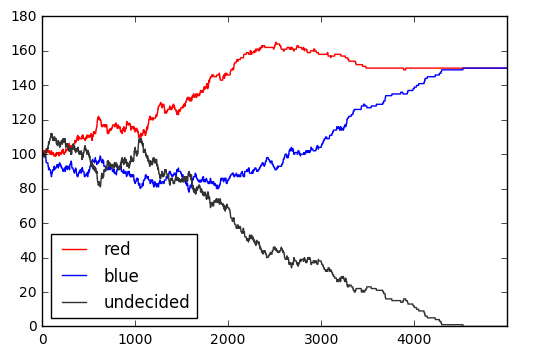

In [90]:
"""
run the main function, kicking off the simulation
"""
wc = main() 

plot_df(wc.create_df())


In [57]:
def p_a_given_h(p, q):
    """
    returns probability of agent accepting given the signal the agent recieves
    p is the prior probability of acceptance p(A)
    q is the probability of a high signal given the correct decision
    is to accept, which is equal to the probability of a low signal given
    the correct decision is to reject.
    """
    prob = (p*q)/((p*q)+(1-p)*(1-q)) #bayes rule
    return prob

def p_a_given_l(p, q):
    prob = ((p)*(1-q))/((p)*(1-q)+(p*q)) #bayes rule
    return prob
    

def p_a_given_h_and_prev(p, q, a, b):
    """
    returns probability of agent accepting given the signal the agent recieves
    and the observed decisions the other agents made
    p is the prior probability of acceptance p(A)
    q is the probability of a high signal given the correct decision is to accept
    a is the previous number of acceptances
    b is the previous number of rejections
    a+b=n which is the total number of agents that have gone before 
    signal, which is equal to the probability of rejection given
    the agent recieves a low signal
    """
    normalizing_factor = 10**10#to avoid division by small numbers
    num = (p*(q**a)*(1-q)**b) * normalizing_factor
    denom = (p*(q**a)*((1-q)**b)+(1-p)*((1-q)**a)*q**b) * normalizing_factor
    prob = num/denom
    return prob

def p_a_given_l_and_prev(p, q, a, b):
    """
    returns probability of agent accepting given the signal the agent recieves
    and the observed decisions the other agents made
    p is the prior probability of acceptance p(A)
    q is the probability of a high signal given the correct decision is to accept
    a is the previous number of acceptances
    b is the previous number of rejections
    a+b=n which is the total number of agents that have gone before 
    signal, which is equal to the probability of rejection given
    the agent recieves a low signal
    """
    normalizing_factor = 10**10#to avoid division by small numbers
    num = ((1-p)*((1-q)**a)*q**b) * normalizing_factor
    denom = (p*(q**a)*((1-q)**b)+(1-p)*((1-q)**a)*q**b) * normalizing_factor
    prob = num/denom
    return prob


In [58]:
p_a_given_l(0.5,0.7)

0.30000000000000004

In [9]:
p_a_given_l_and_prev(0.5, 0.7, 5, 2)


0.07297297297297303

In [10]:
def run_ic(p, q, p_high_sig, runs):
    decisions = []
    probabilities = []
    signals = []
    prob_a_prev = 0.5
    for i in range(1,runs):
        accept = False
        total_a = decisions.count(True)
        total_r = decisions.count(False)
        #print(total_a)
        #print(total_r)
        if (i == 1):
            if (random() <= p_high_sig):
                prob_a = p_a_given_h(p, q)
                signals.append('H')
            else:
                prob_a = p_a_given_l(p, q)
                signals.append('L')
        else:
            if (random() <= p_high_sig): 
            #if (1 <= p_high_sig): 
                
                prob_a = p_a_given_h_and_prev(0.5, q, total_a+1, total_r)
                signals.append('H')
            else:
                #prob_a = p_a_given_l_and_prev(1-prob_a_prev, q, total_a, total_r+1)
                prob_a = p_a_given_h_and_prev(0.5, q, total_a, total_r+1)
                signals.append('L')
        if (prob_a > 0.5):
            accept = True
        else:
            accept = False
        prob_a_prev = prob_a
        decisions.append(accept)
        probabilities.append(prob_a)
    
    decisions_s = pd.Series(decisions)
    probabilities_s = pd.Series(probabilities)
    signals_s = pd.Series(signals)
    
    data = pd.DataFrame()
    data['decisions'] = decisions_s
    data['probabilities'] = probabilities_s
    data['signals_s'] = signals_s
    
    return data



        
        
        

In [11]:
df = run_ic(0.5, 0.60, 0.5, 50)

In [12]:
df

,decisions,probabilities,signals_s
0,False,4.000000e-01,L
1,False,3.076923e-01,L
2,False,4.000000e-01,H
3,False,1.649485e-01,L
4,False,2.285714e-01,H
5,False,8.070618e-02,L
6,False,5.529158e-02,L
7,False,8.070618e-02,H
8,False,2.535281e-02,L
9,False,1.704593e-02,L
